<a href="https://colab.research.google.com/github/jinseriouspark/pytorch_with_jax/blob/main/pytorch_to_jax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transform pytorch to jax

- 활용자료 : https://github.com/hunkim/PyTorchZeroToAll

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Transform pytorch to jax

In [15]:
import pandas as pd

data = pd.read_csv('/content/sample_data/california_housing_train.csv', nrows = 100)
feature_col = 'median_income'
target_col = 'median_house_value'

# 01_basic.py

	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
	 1.0 2.0 1.0 1.0
	 2.0 4.0 2.0 4.0
	 3.0 6.0 3.0 9.0
MSE= 4.666666666666667
	 1.0 2.0 2.0 0.0
	 2.0 4.0 4.0 0.0
	 3.0 6.0 6.0 0.0
MSE= 0.0
	 1.0 2.0 3.0 1.0
	 2.0 4.0 6.0 4.0
	 3.0 6.0 9.0 9.0
MSE= 4.666666666666667


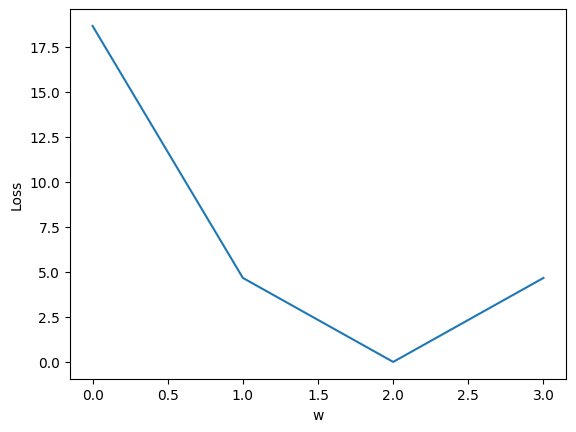

In [19]:
# 01_basic.py
import numpy as np
import matplotlib.pyplot as plt

#x_data = data[feature_col].values
#y_data = data[target_col].values

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

# forward pass
def forward(x):
  return x * w

# loss function
def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) **2

# list of weights/mean square Error (MSE) for each input
w_list = []
mse_list = []

for w in np.arange(0.0, 4.0, 1.0):
  l_sum = 0
  for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
    l = loss(x_val, y_val)
    l_sum += l

    print('\t', x_val, y_val, y_pred_val, l)
  print('MSE=', l_sum/ len(x_data)) # 직접 평균 계산
  w_list.append(w)
  mse_list.append(l_sum / len(x_data))
# Plot it all
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

## 01_basic with jax

Epoch 1, Loss 3.836207151412964
Epoch 2, Loss 3.1535325050354004
Epoch 3, Loss 2.592343330383301
Epoch 4, Loss 2.131021499633789
Epoch 5, Loss 1.7517943382263184
Epoch 6, Loss 1.4400527477264404
Epoch 7, Loss 1.1837871074676514
Epoch 8, Loss 0.9731259346008301
Epoch 9, Loss 0.7999526262283325
Epoch 10, Loss 0.6575968861579895
Epoch 11, Loss 0.5405738353729248
Epoch 12, Loss 0.44437557458877563
Epoch 13, Loss 0.365296334028244
Epoch 14, Loss 0.30028998851776123
Epoch 15, Loss 0.24685168266296387
Epoch 16, Loss 0.20292294025421143
Epoch 17, Loss 0.16681180894374847
Epoch 18, Loss 0.13712671399116516
Epoch 19, Loss 0.11272414773702621
Epoch 20, Loss 0.09266418218612671
Epoch 21, Loss 0.0761740654706955
Epoch 22, Loss 0.06261858344078064
Epoch 23, Loss 0.05147525668144226
Epoch 24, Loss 0.04231487959623337
Epoch 25, Loss 0.03478473424911499
Epoch 26, Loss 0.02859465405344963
Epoch 27, Loss 0.02350599691271782
Epoch 28, Loss 0.019323039799928665
Epoch 29, Loss 0.015884418040513992
Epoch 30,

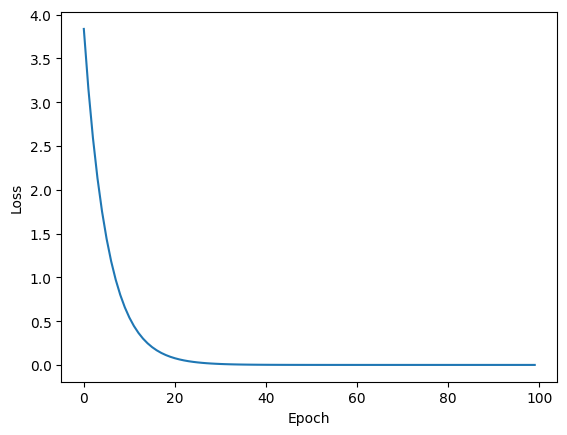

In [23]:
# 01_basic with jax
## jax.numpy as jnp , from jax import grad, jnp.mean() 등을 사용

import datetime
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt

start_time = datetime.datetime.now()
# 데이터 정의
x_data = jnp.array([1.0, 2.0, 3.0])
y_data = jnp.array([2.0, 4.0, 6.0])

# forward pass
def forward(x, w):
  return x * w
# loss
def loss(w, x, y):
  y_pred = forward(x, w)
  return jnp.mean((y_pred - y) **2)

# grad를 계산하는 함수 생성
grad_loss = grad(loss)

# 초기 w 값 설정
w = 1.0

# w업데이트하면서 손실감소
num_epochs = 100
losses = []
lr = 0.01

for epoch in range(num_epochs):
  grad_w = grad_loss(w, x_data, y_data)
  w -= lr * grad_w
  loss_val = loss(w, x_data, y_data)
  losses.append(loss_val)
  print(f'Epoch {epoch + 1}, Loss {loss_val}')

end_time = datetime.datetime.now()
print(end_time - start_time)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 02_manual_gradient.py

In [25]:


# training data
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0

# forward pass
def forward(x):
  return x * w

# loss function
def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) * (y_pred - y)

# compute gradient
def gradient(x, y):
  return 2 * x * (x * w - y)

# before training
print('prediction (before training)', 4, forward(4))

# training loop
for epoch in range(10):
  for x_val, y_val in zip(x_data, y_data):
    grad = gradient(x_val, y_val)
    w = w - 0.01 * grad
    print('\tgrad: ', x_val, y_val, round(grad, 2))
    l = loss(x_val, y_val)
  print('progress:', epoch, 'w=', round(w, 2), 'loss=', round(1, 2))

#after training
print('predicted score (after training)', 4, forward(4))

prediction (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.23
progress: 0 w= 1.26 loss= 1
	grad:  1.0 2.0 -1.48
	grad:  2.0 4.0 -5.8
	grad:  3.0 6.0 -12.0
progress: 1 w= 1.45 loss= 1
	grad:  1.0 2.0 -1.09
	grad:  2.0 4.0 -4.29
	grad:  3.0 6.0 -8.87
progress: 2 w= 1.6 loss= 1
	grad:  1.0 2.0 -0.81
	grad:  2.0 4.0 -3.17
	grad:  3.0 6.0 -6.56
progress: 3 w= 1.7 loss= 1
	grad:  1.0 2.0 -0.6
	grad:  2.0 4.0 -2.34
	grad:  3.0 6.0 -4.85
progress: 4 w= 1.78 loss= 1
	grad:  1.0 2.0 -0.44
	grad:  2.0 4.0 -1.73
	grad:  3.0 6.0 -3.58
progress: 5 w= 1.84 loss= 1
	grad:  1.0 2.0 -0.33
	grad:  2.0 4.0 -1.28
	grad:  3.0 6.0 -2.65
progress: 6 w= 1.88 loss= 1
	grad:  1.0 2.0 -0.24
	grad:  2.0 4.0 -0.95
	grad:  3.0 6.0 -1.96
progress: 7 w= 1.91 loss= 1
	grad:  1.0 2.0 -0.18
	grad:  2.0 4.0 -0.7
	grad:  3.0 6.0 -1.45
progress: 8 w= 1.93 loss= 1
	grad:  1.0 2.0 -0.13
	grad:  2.0 4.0 -0.52
	grad:  3.0 6.0 -1.07
progress: 9 w= 1.95 loss= 1
predicted score (after trainin

## with jax

In [27]:
import jax.numpy as jnp
from jax import grad

x_data = jnp.array([1.0, 2.0, 3.0])
y_data = jnp.array([2.0, 4.0, 6.0])

w = 1.0

def forward(x, w):
  return x * w

def loss(w, x, y):
  y_pred = forward(x, w)
  return jnp.mean((y_pred - y) ** 2)

# gradient 계산,loss 함수를 입력으로 받아들여 그래디언트 계산하는 함수로 반환
grad_loss = grad(loss)

print('prediction (before_training)', forward(4, w))

# training
learning_rate= 0.01
num_epochs = 10

for epoch in range(num_epochs):
  for x_val, y_val in zip(x_data, y_data):
    grad_w = grad_loss(w, x_val, y_val)
    w -= learning_rate * grad_w
    print('\tgrad:', x_val, y_val, round(grad_w, 2))
    loss_val = loss(w, x_val, y_val)
  print('progress:', epoch, 'w=', round(w, 2), 'loss=', round(loss_val, 2))

# 학습 후 예측
print('predicted score (after training):', forward(4, w))

prediction (before_training) 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.8399997
	grad: 3.0 6.0 -16.23
progress: 0 w= 1.26 loss= 4.92
	grad: 1.0 2.0 -1.48
	grad: 2.0 4.0 -5.7999997
	grad: 3.0 6.0 -12.0
progress: 1 w= 1.4499999 loss= 2.69
	grad: 1.0 2.0 -1.09
	grad: 2.0 4.0 -4.29
	grad: 3.0 6.0 -8.87
progress: 2 w= 1.5999999 loss= 1.4699999
	grad: 1.0 2.0 -0.81
	grad: 2.0 4.0 -3.1699998
	grad: 3.0 6.0 -6.56
progress: 3 w= 1.6999999 loss= 0.79999995
	grad: 1.0 2.0 -0.59999996
	grad: 2.0 4.0 -2.34
	grad: 3.0 6.0 -4.85
progress: 4 w= 1.78 loss= 0.44
	grad: 1.0 2.0 -0.44
	grad: 2.0 4.0 -1.73
	grad: 3.0 6.0 -3.58
progress: 5 w= 1.8399999 loss= 0.24
	grad: 1.0 2.0 -0.32999998
	grad: 2.0 4.0 -1.28
	grad: 3.0 6.0 -2.6499999
progress: 6 w= 1.88 loss= 0.13
	grad: 1.0 2.0 -0.24
	grad: 2.0 4.0 -0.95
	grad: 3.0 6.0 -1.9599999
progress: 7 w= 1.91 loss= 0.07
	grad: 1.0 2.0 -0.17999999
	grad: 2.0 4.0 -0.7
	grad: 3.0 6.0 -1.4499999
progress: 8 w= 1.93 loss= 0.04
	grad: 1.0 2.0 -0.13
	grad: 2.0 4.0 -0.52
	

In [29]:
grad_w, loss_val

(Array(-1.0708666, dtype=float32, weak_type=True),
 Array(0.02141885, dtype=float32))

# 03_auto_gradient.py

In [39]:

import torch
import pdb

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = torch.tensor([1.0], requires_grad = True)

# forward pass
def forward(x):
  return x * w

# loss function
def loss(y_pred, y_val):
  return (y_pred - y_val) **2

# before training
print('prediction (before training)', 4, forward(4).item())

# training loop
for epoch in range(20):
  for x_val, y_val in zip(x_data, y_data):
    y_pred = forward(x_val) # 1) forward pass
    l = loss(y_pred, y_val) # 2) compute loss
    l.backward() # 3) backpropagation to update weights
    print('\t grad:', x_val, y_val, w.grad.item())
    w.data = w.data - 0.01 * w.grad.item()

    w.grad.data.zero_()
  print(f'Epoch: {epoch} | loss : {l.item()}')

# after training
print('prediction (after training)', 4, forward(4).item())

prediction (before training) 4 4.0
	 grad: 1.0 2.0 -2.0
	 grad: 2.0 4.0 -7.840000152587891
	 grad: 3.0 6.0 -16.228801727294922
Epoch: 0 | loss : 7.315943717956543
	 grad: 1.0 2.0 -1.478623867034912
	 grad: 2.0 4.0 -5.796205520629883
	 grad: 3.0 6.0 -11.998146057128906
Epoch: 1 | loss : 3.9987640380859375
	 grad: 1.0 2.0 -1.0931644439697266
	 grad: 2.0 4.0 -4.285204887390137
	 grad: 3.0 6.0 -8.870372772216797
Epoch: 2 | loss : 2.1856532096862793
	 grad: 1.0 2.0 -0.8081896305084229
	 grad: 2.0 4.0 -3.1681032180786133
	 grad: 3.0 6.0 -6.557973861694336
Epoch: 3 | loss : 1.1946394443511963
	 grad: 1.0 2.0 -0.5975041389465332
	 grad: 2.0 4.0 -2.3422164916992188
	 grad: 3.0 6.0 -4.848389625549316
Epoch: 4 | loss : 0.6529689431190491
	 grad: 1.0 2.0 -0.4417421817779541
	 grad: 2.0 4.0 -1.7316293716430664
	 grad: 3.0 6.0 -3.58447265625
Epoch: 5 | loss : 0.35690122842788696
	 grad: 1.0 2.0 -0.3265852928161621
	 grad: 2.0 4.0 -1.2802143096923828
	 grad: 3.0 6.0 -2.650045394897461
Epoch: 6 | loss

## with jax
- torch 구현보다 예측력이 떨어진다!?

In [40]:
import jax.numpy as jnp
from jax import grad

x_data = jnp.array([1.0, 2.0, 3.0])
y_data = jnp.array([2.0, 4.0, 6.0])

w = jnp.array([1.0])

def forward(x):
  return x * w

def loss(y_pred, y_val):
  return jnp.mean((y_pred - y_val)**2)

grad_loss = grad(loss)

print('prediction (before training)', 4, forward(4)[0])

lr = 0.01
for epoch in range(20):
  for x_val, y_val in zip(x_data, y_data):
    # y_pred = forward(x_val) # 1) forward pass
    #l = loss(y_pred, y_val) # 2) compute loss
    #l.backward() # 3) backpropagation to update weights
    #print('\t grad:', x_val, y_val, w.grad.item())
    y_pred = forward(x_val)
    grad_w = grad_loss(y_pred, y_val)
    w -= learning_rate * grad_w[0]
    print('\tgrad: ', x_val, y_val, grad_w)

  print(f'Epoch: {epoch} | Loss: {loss(forward(x_data), y_data)}')

print('prediction (after training)', 4, forward(4)[0])

prediction (before training) 4 4.0
	grad:  1.0 2.0 [-2.]
	grad:  2.0 4.0 [-3.92]
	grad:  3.0 6.0 [-5.6448]
Epoch: 0 | Loss: 3.649700164794922
	grad:  1.0 2.0 [-1.7687042]
	grad:  2.0 4.0 [-3.46666]
	grad:  3.0 6.0 [-4.99199]
Epoch: 1 | Loss: 2.854351758956909
	grad:  1.0 2.0 [-1.564157]
	grad:  2.0 4.0 [-3.0657477]
	grad:  3.0 6.0 [-4.4146767]
Epoch: 2 | Loss: 2.2323265075683594
	grad:  1.0 2.0 [-1.3832653]
	grad:  2.0 4.0 [-2.7111998]
	grad:  3.0 6.0 [-3.9041271]
Epoch: 3 | Loss: 1.7458542585372925
	grad:  1.0 2.0 [-1.2232933]
	grad:  2.0 4.0 [-2.397655]
	grad:  3.0 6.0 [-3.4526234]
Epoch: 4 | Loss: 1.365395426750183
	grad:  1.0 2.0 [-1.0818219]
	grad:  2.0 4.0 [-2.1203709]
	grad:  3.0 6.0 [-3.0533333]
Epoch: 5 | Loss: 1.0678461790084839
	grad:  1.0 2.0 [-0.9567113]
	grad:  2.0 4.0 [-1.875154]
	grad:  3.0 6.0 [-2.700222]
Epoch: 6 | Loss: 0.8351394534111023
	grad:  1.0 2.0 [-0.8460696]
	grad:  2.0 4.0 [-1.6582966]
	grad:  3.0 6.0 [-2.387947]
Epoch: 7 | Loss: 0.6531445384025574
	grad:  

# 05_linear_regression.py

In [41]:
from torch import nn
import torch
from torch import tensor

x_data = tensor([[1.0], [2.0], [3.0]])
y_data = tensor([[2.0], [4.0], [6.0]])

In [42]:
class Model(nn.Module):
  def __init__(self):
    """
    In the constructor we instantiate two nn.Linear module
    """
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1) # one in and one out

  def forward(self, x):
    """
    In the forward function we accept a Variable of input data and
    we must return a Variable of output data.
    We can use Modules defined in the constructor as well as arbitary operators
    on Variables.
    """
    y_pred = self.linear(x)
    return y_pred

In [44]:
model = Model()

# loss function & optimizer
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [46]:
# traning loop
for epoch in range(500):
  # forward pass : compute prediction y by passing x to the model
  y_pred = model(x_data)

  # compute and print loss
  loss = criterion(y_pred, y_data)
  print(f'Epoch: {epoch} | Loss: {loss.item()}')

  # zero gradients, backward pass, update the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# after training
hour_var = tensor([[4.0]])
y_pred = model(hour_var)
print('prediction (after training)', 4, model(hour_var).data[0][0].item())

Epoch: 0 | Loss: 0.00018834293587133288
Epoch: 1 | Loss: 0.0001856395392678678
Epoch: 2 | Loss: 0.00018296904454473406
Epoch: 3 | Loss: 0.00018033820379059762
Epoch: 4 | Loss: 0.00017775199376046658
Epoch: 5 | Loss: 0.00017519446555525064
Epoch: 6 | Loss: 0.00017267459770664573
Epoch: 7 | Loss: 0.00017019266670104116
Epoch: 8 | Loss: 0.00016774755204096437
Epoch: 9 | Loss: 0.00016534252790734172
Epoch: 10 | Loss: 0.00016295863315463066
Epoch: 11 | Loss: 0.00016062222130130976
Epoch: 12 | Loss: 0.00015831220662221313
Epoch: 13 | Loss: 0.00015604069631081074
Epoch: 14 | Loss: 0.00015378993703052402
Epoch: 15 | Loss: 0.0001515841722721234
Epoch: 16 | Loss: 0.00014940783148631454
Epoch: 17 | Loss: 0.00014725570508744568
Epoch: 18 | Loss: 0.00014514299982693046
Epoch: 19 | Loss: 0.00014305739023257047
Epoch: 20 | Loss: 0.0001410054974257946
Epoch: 21 | Loss: 0.00013897119788452983
Epoch: 22 | Loss: 0.00013698023394681513
Epoch: 23 | Loss: 0.00013500973000191152
Epoch: 24 | Loss: 0.000133066

## with jax
- jax 는 pytorch와 다르게 함수형 프로그램을 강조하고 있음 (class 가 필요없음)
- 모델과 관련된 파라미터와 계산을 함수로 구현하여 사용하는 것이 일반적임


### 변경사항
  - loss 를 optax 내장함수로 바꾸어줌
  - opimizer 가 2줄짜리로 변경 : opt_state, params 업데이트 필요

### optax 를 사용한 최적화 코드

[참고자료](https://optax.readthedocs.io/en/latest/api/optimizers.html#optax.sgd)

```
# optax.sgd 를 활용해 optimizer 를 초기화 할때, params 가 jax 배열이 아니기때문에 오류가 발생
optimizer = optax.sgd(learning_rate = 0.01)

# 아래와 같이 한번 init 해주어야함
opt_state = optimizer.init(params)


# optimizer 를 활용해 업데이트를 하면 opt_state 가 업데이트 되며,
# 이를 다시 apply_updates 로 처리해서 실제 업데이트도 진행
updates, opt_state = optimizer.update(grads, opt_state, params)
params = optax.apply_updates(params, updates)

```


Q. jit 을 gradient 계산하는 부분에 적용하기 위해서는 어떻게 해야 하는가?


chat gpt 설명
```
@jit
def value_and_grad(params, x, y):
    return jax.value_and_grad(loss)(params, x, y)
```


In [1]:
import jax.numpy as jnp
from jax import grad, jit
import optax

x_data = jnp.array([[1.0], [2.0], [3.0]])
y_data = jnp.array([[2.0], [4.0], [6.0]])

# define model
def model(params, x):
  return jnp.dot(x, params['weight']) + params['bias']

# define loss(params)
def loss(params, x, y):
  y_pred = model(params, x)
  return jnp.mean((y_pred - y) ** 2)

# gradient computation
grad_loss = grad(loss)

# initialize parameters
init_params = {'weight': jnp.array([[1.0]]), 'bias': jnp.array([0.0])}

# initialize optimizer


In [2]:
import jax
import jax.numpy as jnp
from jax import grad, jit
import optax

# Define data
x_data = jnp.array([[1.0], [2.0], [3.0]])
y_data = jnp.array([[2.0], [4.0], [6.0]])

# Define model
def model(params, x):
    return jnp.dot(x, params['weight']) + params['bias']

# Loss function
def loss(params, x, y):
    y_pred = model(params, x)
    return jnp.mean((y_pred - y) ** 2)

# Gradient computation
grad_loss = grad(loss)

# Initialize parameters
init_params = {'weight': jnp.array([[1.0]]), 'bias': jnp.array([0.0])}

# Initialize optimizer
optimizer = optax.sgd(learning_rate=0.01)

@jit
def update(params, opt_state, x, y):
    grads = grad_loss(params, x, y)
    updates, opt_state = optimizer.update(grads, opt_state)
    new_params = optax.apply_updates(params, updates)
    return new_params, opt_state

# Initialize optimizer state
opt_state = optimizer.init(init_params)

# Training loop
num_epochs = 500
params = init_params

for epoch in range(num_epochs):
    params, opt_state = update(params, opt_state, x_data, y_data)
    loss_val = loss(params, x_data, y_data)
    print(f'Epoch: {epoch} | Loss: {loss_val}')

# After training
hour_var = jnp.array([[4.0]])
y_pred = model(params, hour_var)
print("Prediction (after training):", 4, y_pred[0][0])


Epoch: 0 | Loss: 3.6927404403686523
Epoch: 1 | Loss: 2.9228854179382324
Epoch: 2 | Loss: 2.3143362998962402
Epoch: 3 | Loss: 1.8332923650741577
Epoch: 4 | Loss: 1.4530338048934937
Epoch: 5 | Loss: 1.1524405479431152
Epoch: 6 | Loss: 0.9148194193840027
Epoch: 7 | Loss: 0.7269737720489502
Epoch: 8 | Loss: 0.5784738659858704
Epoch: 9 | Loss: 0.46107369661331177
Epoch: 10 | Loss: 0.36825668811798096
Epoch: 11 | Loss: 0.2948717176914215
Epoch: 12 | Loss: 0.23684683442115784
Epoch: 13 | Loss: 0.19096308946609497
Epoch: 14 | Loss: 0.15467634797096252
Epoch: 15 | Loss: 0.1259755939245224
Epoch: 16 | Loss: 0.1032714694738388
Epoch: 17 | Loss: 0.08530738204717636
Epoch: 18 | Loss: 0.07108993083238602
Epoch: 19 | Loss: 0.05983422324061394
Epoch: 20 | Loss: 0.05091980844736099
Epoch: 21 | Loss: 0.04385606199502945
Epoch: 22 | Loss: 0.03825516626238823
Epoch: 23 | Loss: 0.03381074592471123
Epoch: 24 | Loss: 0.0302805807441473
Epoch: 25 | Loss: 0.027473006397485733
Epoch: 26 | Loss: 0.02523679845035

# 06_logistic_regression.py

In [ ]:
from torch import tensor
from torch import nn
from torch import sigmoid
import torch.nn.functional as F
import torch.optim as optim

# dataset
x_data = tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = tensor([[0.], [0.], [1.], [1.]])

class Model(nn.Module):
  def __init__(self):
    """
    instantiate nn.Linear Module
    """
    super(Model, self).__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    y_pred = sigmoid(self.linear(x))
    return y_pred

# out model
model = Model()

# loss function & optimizer contruction
# call to model.parameters()
criterion = nn.BCELoss(reduction = 'mean')
optimizer = optim.SGD(model.parameters(), lr = 0.01)


#Traning loop
for epoch in range(1000):
  # forward pass : compute predicted y by passing x to the model
  y_pred = model(x_data)

  # compute and print loss
  loss = criterion(y_pred, y_data)
  print(f'Epoch {epoch + 1}/1000 | Loss: {loss.item():.4f}')

  #zero gradient, perform a backward pass, update the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

#After training
print(f'\nLet\'s predict the hours need to score above 50%\n{"=" * 50}')
hour_var = model(tensor([[1.0]]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() > 0.5}')
hour_var = model(tensor([[7.0]]))
print(f'Prediction after 7 hours of training: {hour_var.item():.4f} | Above 50%: { hour_var.item() > 0.5}')

## with jax


In [27]:
import jax
import jax.numpy as jnp
from jax import jit
import optax

x_data = jnp.array([[1.0], [2.0], [3.0], [4.0]])
y_data = jnp.array([[0.], [0.], [1.], [1.]])

# defind model
def model(params, x): # 이 부분에서, init_params 에서 받은 값들을
  return jax.nn.sigmoid(jnp.dot(x, params['weight']) + params['bias'])

def loss(params, x, y):
  y_pred = model(params, x)
  return optax.sigmoid_binary_cross_entropy(y_pred, y).mean()

# value and gradient computation


# Initialize parameters
key = jax.random.PRNGKey(0)  # Define random key
init_params = {
    'weight': jax.random.normal(key, (1, 1)),
    'bias': jax.random.normal(key, (1,))
}
optimizer = optax.sgd(learning_rate = 0.01)
# optax.sgd 를 활용해 optimizer 를 초기화 할때, params 가 jax 배열이 아니기때문에 오류가 발생
opt_state = optimizer.init(params)

num_epochs = 1000
params = init_params

# @jit
# def value_and_grad(params, x, y):
#     return jax.value_and_grad(loss)(params, x, y)

for epoch in range(num_epochs):

  # jit으로 선언한 함수를 사용할 떄
  # loss_val, grads = value_and_grad(params,x_data, y_data)

  loss_val, grads = jax.value_and_grad(loss)(params,x_data, y_data)
  #print(params)
  updates, opt_state = optimizer.update(grads, opt_state, params)
  params = optax.apply_updates(params, updates)
  #print(params)
  print(f'Epoch {epoch + 1}/{num_epochs} | loss : {loss_val}')

Epoch 1/1000 | loss : 0.7295204401016235
Epoch 2/1000 | loss : 0.7294896841049194
Epoch 3/1000 | loss : 0.7294589281082153
Epoch 4/1000 | loss : 0.7294280529022217
Epoch 5/1000 | loss : 0.729397177696228
Epoch 6/1000 | loss : 0.7293662428855896
Epoch 7/1000 | loss : 0.7293352484703064
Epoch 8/1000 | loss : 0.7293041944503784
Epoch 9/1000 | loss : 0.7292732000350952
Epoch 10/1000 | loss : 0.7292420268058777
Epoch 11/1000 | loss : 0.7292108535766602
Epoch 12/1000 | loss : 0.7291796207427979
Epoch 13/1000 | loss : 0.7291483879089355
Epoch 14/1000 | loss : 0.7291171550750732
Epoch 15/1000 | loss : 0.7290857434272766
Epoch 16/1000 | loss : 0.7290543913841248
Epoch 17/1000 | loss : 0.7290228605270386
Epoch 18/1000 | loss : 0.7289913892745972
Epoch 19/1000 | loss : 0.7289597988128662
Epoch 20/1000 | loss : 0.7289282083511353
Epoch 21/1000 | loss : 0.7288966178894043
Epoch 22/1000 | loss : 0.7288649082183838
Epoch 23/1000 | loss : 0.7288331985473633
Epoch 24/1000 | loss : 0.7288013696670532
Ep

## 07_diabets_logistic.py

In [29]:
from torch import nn, optim, from_numpy
import numpy as np

xy = np.loadtxt('/content/drive/MyDrive/google_jax/data/diabetes.csv.gz', delimiter=',', dtype = np.float32)
x_data = from_numpy(xy[:, 0: -1])
y_data = from_numpy(xy[:, [-1]])

print(f'X\'s shape: {x_data.shape} | Y\'s shape: {y_data.shape}')

X's shape: torch.Size([759, 8]) | Y's shape: torch.Size([759, 1])


In [ ]:
class Model(nn.Module):
  def __init__(self):
    super(model, self)